In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
diabetes = pd.read_csv(r"dataset\diabetes_data.csv")

In [4]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

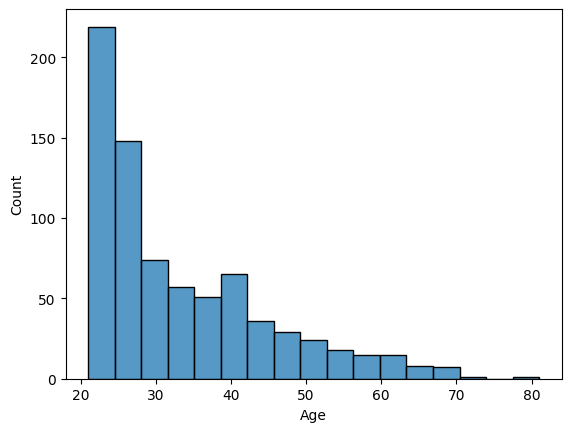

In [6]:
sns.histplot(data=diabetes,x=diabetes["Age"])
plt.show()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# diabetes["Age"]=scaler.fit_transform(diabetes[["Age"]])


In [17]:
x = diabetes.drop("Outcome",axis=1)
y = diabetes["Outcome"]

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#### LOGISTIC REGRESSION MODEL

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\satwi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
lr.score(x_test,y_test)

0.8181818181818182

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred)*100,"%\n")
print("Report:",classification_report(y_test,y_pred))

[[97 10]
 [18 29]]
Accuracy: 81.81818181818183 %

Report:               precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



#### RANDOM FOREST MODEL

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
rf.score(x_test,y_test)

0.8376623376623377

In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred)*100,"%\n")
print("Report:",classification_report(y_test,y_pred))

[[98  9]
 [16 31]]
Accuracy: 83.76623376623377 %

Report:               precision    recall  f1-score   support

           0       0.86      0.92      0.89       107
           1       0.78      0.66      0.71        47

    accuracy                           0.84       154
   macro avg       0.82      0.79      0.80       154
weighted avg       0.83      0.84      0.83       154



#### SAVING THE MODEL ✈️

In [63]:
import pickle
pickle.dump(rf,open("diabetes_model.pkl","wb"))